<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Titanic Dataset Classification</h3>
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#data" role="tab" aria-controls="profile">Fetch the data<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#down" role="tab" aria-controls="settings">Exploratory Data Analysis<span class="badge badge-primary badge-pill">2</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#fe" role="tab" aria-controls="settings">Feature Engineering<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#pred" role="tab" aria-controls="settings">Modelling and Prediction<span class="badge badge-primary badge-pill">4</span></a>

# <a id='data'>1. Fetch the data</a> 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.inspection import permutation_importance
import warnings; warnings.simplefilter('ignore')
import statsmodels.api as sm 
import gc
import re

train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# <a id='down'>2. EDA</a>  

All the exploratory data analysis is done in Tableau 


# <a id='fe'>3. Feature Engineering</a>   

In [72]:
def Feature_Engineering(df):
     
    df.Embarked = df.Embarked.fillna('S') 
    # As only 2 values are missing I am assuming Port of Embarkation is Southampton(S) as majority of people aboarded from S
    
    
    df.Cabin = df.Cabin.fillna('0')
    df['Has_Cabin'] = df["Cabin"].apply(lambda x: 0 if x == '0' else 1)
    
    
    df['Family_Size'] = df.SibSp + df.Parch + 1
    
    
    df['Alone'] = df["Family_Size"].apply(lambda x: 1 if x == 1 else 0)
    
    
    df['Age'][np.isnan(df['Age'])] = np.random.randint(df.Age.mean() - df.Age.std() , df.Age.mean() + df.Age.std(), size = df.Age.isnull().sum())
    
#     def get_title(name):
#         title_search = re.search(' ([A-Za-z]+)\.', name)  #re.search(Pattern,Text) returns true or false
#         # If the title exists, extract and return it.
    
#         if title_search:
#             return title_search.group(1)
#         return ""

#     df['Title'] = df['Name'].apply(get_title)  
#     #since function get_title expect string like object can't use get_title(train['Name'])
    
#     #Introduce new column if the person has titles like Dr, Col, Capt,Sir, Lady, Rev (to check if having these titles help)
       
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    
    encoder=ce.OneHotEncoder(cols='Embarked',handle_unknown='return_nan',return_df=True,use_cat_names=True)
    con= encoder.fit_transform(df['Embarked'])
    df= pd.concat([df,con.iloc[:,1:]], axis=1)
    #df['Embarked'] = df['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)
    df= df.drop('Embarked',axis=1)

    
    df['Age_Bins'] = 0
    df.loc[ df['Age'] <= 16, 'Age_Bins'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age_Bins'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age_Bins'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age_Bins'] = 3
    df.loc[ df['Age'] > 64, 'Age_Bins'] = 4 
    
    
    df['Fare_Bins'] = 0
    df.loc[ df['Fare'] <= 10, 'Fare_Bins'] = 0   
    df.loc[(df['Fare'] > 10) & (df['Fare'] <= 40), 'Fare_Bins'] = 1  
    df.loc[(df['Fare'] > 40) & (df['Fare'] <= 80), 'Fare_Bins'] = 2  
    df.loc[ df['Fare'] > 80, 'Fare_Bins'] = 3 
    
    
    return df    

Feature Selection

In [73]:
df_train = train.copy()
df_train = Feature_Engineering(df_train)
df_train = df_train.drop(['Name','Ticket','Cabin','Age','SibSp','Parch','Fare','PassengerId'],axis=1)


df_test = test.copy()
df_test = Feature_Engineering(df_test)
df_test = df_test.drop(['Name','Ticket','Cabin','Age','SibSp','Parch','Fare','PassengerId'],axis=1)

X = df_train.drop( 'Survived',axis = 1)
Y = df_train['Survived']


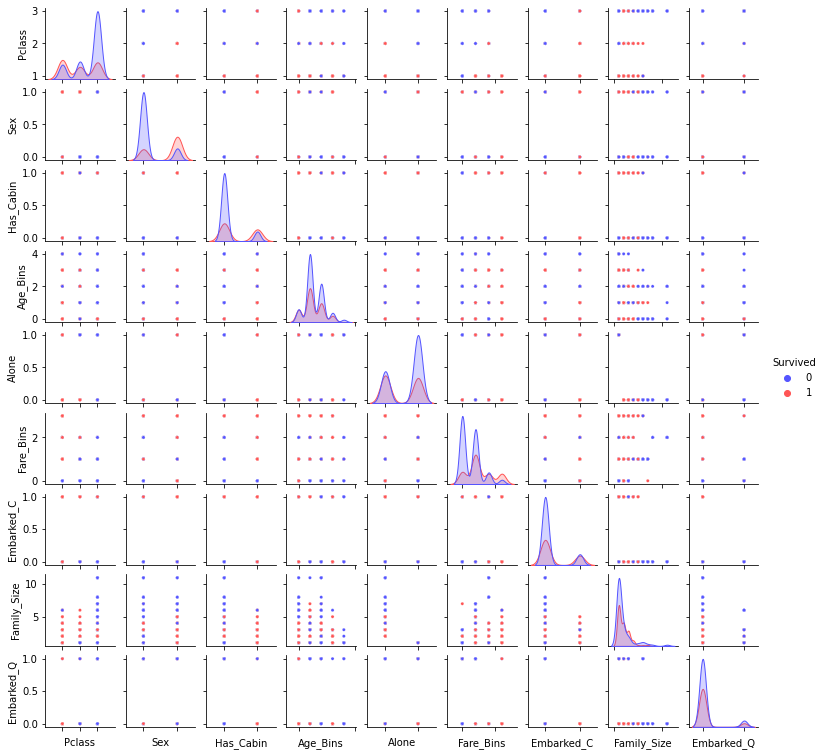

In [74]:
g = sns.pairplot(df_train[[u'Survived', u'Pclass', u'Sex', u'Has_Cabin', u'Age_Bins', u'Alone', u'Fare_Bins', u'Embarked_C',
       u'Family_Size', u'Embarked_Q']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

# <a id='pred'>4. Modelling and Prediction</a> 

Logistic Regression 


Naive Bayes 

Decision Tree Classifier

SVM with linear Kernel

In [75]:
algos = {


		'Logistic Regression' : {'model': LogisticRegression,
                             'parameters': {'penalty': ['l2','none'],
                                            'fit_intercept' : [True,False],
                                            'solver' : ['lbfgs','liblinear','sag','saga']
                                              }
                          		},


	'Naive Bayes multinomial' : {'model': MultinomialNB,
                              'parameters': {'alpha': [0.01,0.1,0.5,1,2,5,10,20],
                                            'fit_prior': ['random', 'cyclic']
                                         }
                          		},
    
        
	'Decision Tree Classifier': {'model': tree.DecisionTreeClassifier, 
                            'parameters': {'criterion' : ['gini','entropy'],
                                           'splitter': ['best','random']
                                          }
                          		},
         
       	'SVM': {'model':svm.SVC, 
                           'parameters': {'kernel' :['linear']
                                         }
                         		}
        	
        }

# Model 

In [76]:
seed = 100

class Model():

    seed = 100 
    def __init__(self,dataframe,X,Y,algo_dictionary, problem_type):
        self.df = dataframe
        self.algos = algo_dictionary
        self.problem_type = problem_type
        self.X = X
        self.Y = Y
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X,self.Y,test_size=0.2,random_state= self.seed)


    def Gridsearch(self,name,update_best_features = None):


        for key,value in self.algos[name].items():

            cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=self.seed)
            gs =  GridSearchCV(value['model'](), value['parameters'], cv=cv, return_train_score=False)
            gs.fit(self.X,self.Y)

            if update_best_features is True:
                value['parameters'] = gs.best_params_


        print({'model': key,'best_score': gs.best_score_,'best_parameters': gs.best_params_})


    def Gridsearch_all(self,update_best_features = None):


        table = []
        for key,value in self.algos.items():

            cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state= self.seed)
            gs =  GridSearchCV(value['model'](), value['parameters'], cv=cv, return_train_score=False)
            gs.fit(self.X,self.Y)
            table.append({'model': key,'best_score': gs.best_score_,'best_parameters': gs.best_params_})

            if update_best_features is True:
                value['parameters'] = gs.best_params_


        table = pd.DataFrame(table)
        return(table)


    def train(self,algorithm_name):


        parameters = self.algos[algorithm_name]['parameters']
        self.algos[algorithm_name]['model'] = self.algos[algorithm_name]['model'](**parameters)
        self.self.algos[algorithm_name]['model'].fit(self.X_train,self.Y_train)


        # for key,value in algos[name].items():
        # 	parameters = value['parameters']
        # 	value['model'] = value['model'](**parameters)
        # 	value['model'].fit(x_train, y_train)


        predictions = self.algos[algorithm_name]['model'].predict(self.X_test)
        if self.problem_type == 'Classification':
            print('Classification report after predicting on testing data for', algorithm_name)
            print(classification_report(self.Y_test, predictions))
            print('TN,FN')
            print('FP,TP')
            print(confusion_matrix(self.Y_test, predictions))


    def train_all(self):
        for key,value in self.algos.items():
            parameters = value['parameters']
            value['model'] = value['model'](**parameters)
            value['model'].fit(self.X_train, self.Y_train)

            predictions = value['model'].predict(self.X_test)
            if self.problem_type == 'Classification':
                print('Classification report after predicting on testing data for', key)
                print(classification_report(self.Y_test, predictions))
                print('TN,FN')
                print('FP,TP')
                print(confusion_matrix(self.Y_test, predictions))
                print('\n')

            if self.problem_type == 'Regression':
                pass


    def predict(self,x_input,algorithm_name):
        predictions = self.algos[algorithm_name]['model'].predict(x_input)
        return predictions


    def feature_importances(self,x,y):
        pass


    def permutation_importances(self,x,y):
        pass


    def remove_algo(self, name):
        del self.algos[str(name)]


    def add_algo(self,dict):
        self.algos.update(dict)


    def reset_seed(self , new_seed):
        self.seed = new_seed


    def report(self):
        if self.problem_type == 'Regression':
            pass

        elif self.problem_type == 'Classification':
            pass

        else:
            print('Please define problem_type')



In [77]:
sn1 = Model(df_train,X,Y,algos,'Classification')

In [78]:
table = sn1.Gridsearch_all(update_best_features= True)
print(table)


                      model  best_score  \
0       Logistic Regression    0.796648   
1   Naive Bayes multinomial    0.746369   
2  Decision Tree Classifier    0.794413   
3                       SVM    0.776536   

                                     best_parameters  
0  {'fit_intercept': True, 'penalty': 'l2', 'solv...  
1               {'alpha': 10, 'fit_prior': 'random'}  
2        {'criterion': 'gini', 'splitter': 'random'}  
3                               {'kernel': 'linear'}  


In [81]:
sn1.algos

{'Logistic Regression': {'model': sklearn.linear_model._logistic.LogisticRegression,
  'parameters': {'fit_intercept': True, 'penalty': 'l2', 'solver': 'saga'}},
 'Naive Bayes multinomial': {'model': sklearn.naive_bayes.MultinomialNB,
  'parameters': {'alpha': 10, 'fit_prior': 'random'}},
 'Decision Tree Classifier': {'model': sklearn.tree._classes.DecisionTreeClassifier,
  'parameters': {'criterion': 'gini', 'splitter': 'random'}},
 'SVM': {'model': sklearn.svm._classes.SVC,
  'parameters': {'kernel': 'linear'}}}

In [82]:
sn1.train_all()


Classification report after predicting on testing data for Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       104
           1       0.78      0.72      0.75        75

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

TN,FN
FP,TP
[[89 15]
 [21 54]]


Classification report after predicting on testing data for Naive Bayes multinomial
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       104
           1       0.76      0.52      0.62        75

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.71       179
weighted avg       0.74      0.73      0.72       179

TN,FN
FP,TP
[[92 12]
 [36 39]]


Classification report after predicting on testing data for Decision Tree Classifier
              precision    recall 

In [14]:
predict_df_test = sn1.predict(df_test.dropna(),'Logistic Regression')